# Intrinsic performance metrics for all graphs

In [1]:
import os
os.chdir('..')
print(os.getcwd())

import pickle
from tigger_package.orchestrator import Orchestrator
from tigger_package.metrics.distribution_metrics import NodeDistributionMetrics, EdgeDistributionMetrics
from tigger_package.tools import plot_adj_matrix
import networkx as nx 
import pandas as pd
import time

/Users/tonpoppe/workspace/tigger_adj_rep/tigger_adj
loaded
loaded


In [15]:
graphs = {
    'enron': "data/enron/",
    'mooc':  "data/mooc/"
}

Processing metric for enron
enron: orig has (2689, 10) format and synth edges (2576, 10)


/Users/tonpoppe/workspace/tigger_adj_rep/tigger_adj/tigger_package/metrics/distribution_metrics.py:194: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


,value,type,metric
attr_received_size,0.016905,node_attributes,Wasserstein_distance
attr_cnt_to,0.034091,node_attributes,Wasserstein_distance
attr_cnt_cc,0.038219,node_attributes,Wasserstein_distance
attr_sent_size,0.019251,node_attributes,Wasserstein_distance
attr_cnt_send,0.038412,node_attributes,Wasserstein_distance
cnt_forward,0.107331,edge_attributes,Wasserstein_distance
size,0.102291,edge_attributes,Wasserstein_distance
cnt_reply,0.096052,edge_attributes,Wasserstein_distance
cnt_cc,0.102252,edge_attributes,Wasserstein_distance
size_to,0.121780,edge_attributes,Wasserstein_distance


Processing metric for mooc
mooc: orig has (178443, 7) format and synth edges (6732, 7)


/Users/tonpoppe/workspace/tigger_adj_rep/tigger_adj/tigger_package/metrics/distribution_metrics.py:194: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


,value,type,metric
degree,0.168775,node_attributes,Wasserstein_distance
LABEL,0.175142,node_attributes,Wasserstein_distance
is_user,0.804003,node_attributes,Wasserstein_distance
FEATURE0,0.330724,edge_attributes,Wasserstein_distance
FEATURE1,0.237120,edge_attributes,Wasserstein_distance
FEATURE2,0.010122,edge_attributes,Wasserstein_distance
FEATURE3,0.004266,edge_attributes,Wasserstein_distance
weight,0.185755,edge_attributes,Wasserstein_distance
in_degree,0.989474,edge_degree,Wasserstein_distance
out_degree,131.926316,edge_degree,Wasserstein_distance


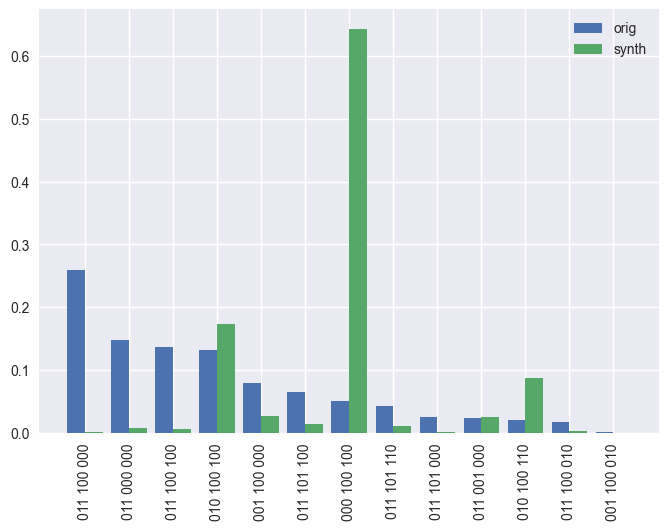

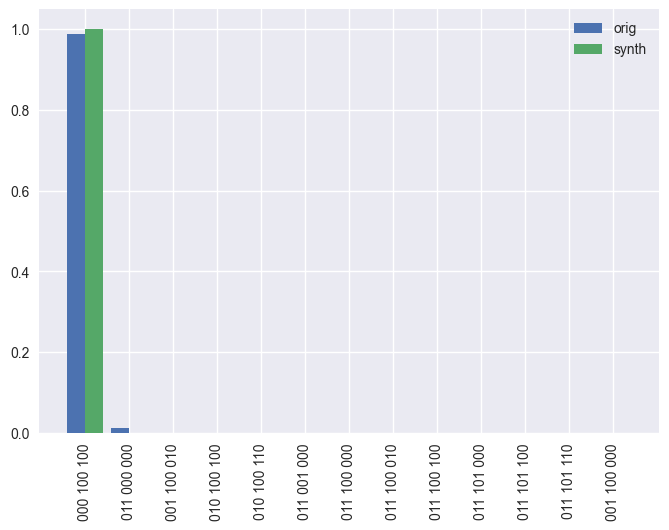

In [16]:
for name, path in graphs.items():
    print(f"Processing metric for {name}")
    # load original nodes and edges
    orchestrator = Orchestrator(path)
    nodes = orchestrator._load_nodes()
    edges = orchestrator._load_edges()
    
    # load synthetic nodes and edges
    synth_nodes = pd.read_parquet(path + 'synth_graph/node_attributes_final.parquet')
    synth_edges = pd.read_parquet(path + 'synth_graph/adjacency_final.parquet')
    print(f"{name}: orig has {edges.shape} format and synth edges {synth_edges.shape}")
    
    # node attributes
    ndm = NodeDistributionMetrics(nodes, synth_nodes)
    node_metric_df = ndm.calculate_wasserstein_distance()
    
    # edge atributes
    edm = EdgeDistributionMetrics(edges, synth_edges)
    edge_metrec_df = edm.calculate_wasserstein_distance()
    
    degree_metric_df = edm.get_degree_wasserstein_distance()
    _, widget_delta_df = edm.widgets_distr()
    cc_df = edm.clustering_coef_undirected()
    
    results = pd.concat([node_metric_df,edge_metrec_df,degree_metric_df, cc_df], axis=0)
    display(results)

/Users/tonpoppe/workspace/tigger_adj_rep/tigger_adj/tigger_package/metrics/distribution_metrics.py:194: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


,Subgraph.1,edges_freq,edges_frac,synth_edges_freq,synth_edges_frac,delta
0,011 100 000,11061,0.258906,229,0.001988,0.256918
1,011 000 000,6282,0.147044,865,0.007509,0.139534
2,011 100 100,5837,0.136627,618,0.005365,0.131262
3,010 100 100,5654,0.132344,20050,0.174060,0.041716
4,001 100 000,3380,0.079116,2999,0.026035,0.053081
5,011 101 100,2761,0.064627,1601,0.013899,0.050728
6,000 100 100,2149,0.050302,74020,0.642591,0.592289
7,011 101 110,1847,0.043233,1312,0.011390,0.031843
8,011 101 000,1098,0.025701,90,0.000781,0.024920
9,011 001 000,990,0.023173,2895,0.025132,0.001959


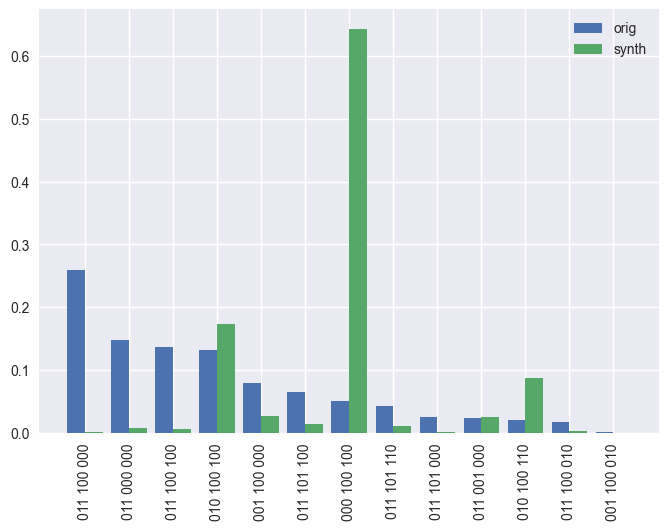

In [9]:
df , widget_delta_df = edm.widgets_distr()
df
